In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
numerical_columns = ['Age','Temperature','Pulse', 'Platelet', 'RBS','Systolic', 'Diastolic']

Categorical_columns = [
    "Gender", "Fever", "Cough", "Headache", "Body ache","Abdominal_pain","Vomiting_Nausea", 
    "Weakness","Diarrhea", "Bleeding", "Anaemia", "Dehydration", "NS1"
]

In [3]:
df = pd.read_csv("clean_data.csv")
df.drop(columns=["Unnamed: 0"], axis = 1, inplace=True)
df.head()

,Age,Gender,Fever,Cough,Headache,Body ache,Temperature,Diarrhea,Bleeding,Pulse,Platelet,RBS,Anaemia,Dehydration,NS1,Systolic,Diastolic,Weakness,Vomiting_Nausea,Abdominal_pain
0,25.0,1,1.0,0.0,0.0,1.0,100.101796,0.0,0.0,90.0,45000.000000,9.569364,1.0,0.0,1,100.0,70.0,1.0,0.0,0
1,21.0,0,1.0,0.0,1.0,1.0,100.101796,0.0,0.0,68.0,90000.000000,5.600000,1.0,0.0,1,110.0,70.0,1.0,1.0,0
2,28.0,1,1.0,0.0,1.0,0.0,100.101796,1.0,0.0,88.0,115801.561798,9.569364,0.0,0.0,1,110.0,90.0,1.0,0.0,1
3,40.0,0,0.0,1.0,1.0,0.0,100.101796,0.0,0.0,141.0,76000.000000,6.670000,0.0,0.0,1,120.0,100.0,1.0,0.0,0
4,60.0,0,1.0,1.0,0.0,0.0,100.101796,1.0,0.0,62.0,55000.000000,8.600000,1.0,1.0,1,100.0,70.0,1.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              721 non-null    float64
 1   Gender           721 non-null    int64  
 2   Fever            721 non-null    float64
 3   Cough            721 non-null    float64
 4   Headache         721 non-null    float64
 5   Body ache        721 non-null    float64
 6   Temperature      721 non-null    float64
 7   Diarrhea         721 non-null    float64
 8   Bleeding         721 non-null    float64
 9   Pulse            721 non-null    float64
 10  Platelet         721 non-null    float64
 11  RBS              721 non-null    float64
 12  Anaemia          721 non-null    float64
 13  Dehydration      721 non-null    float64
 14  NS1              721 non-null    int64  
 15  Systolic         721 non-null    float64
 16  Diastolic        721 non-null    float64
 17  Weakness        

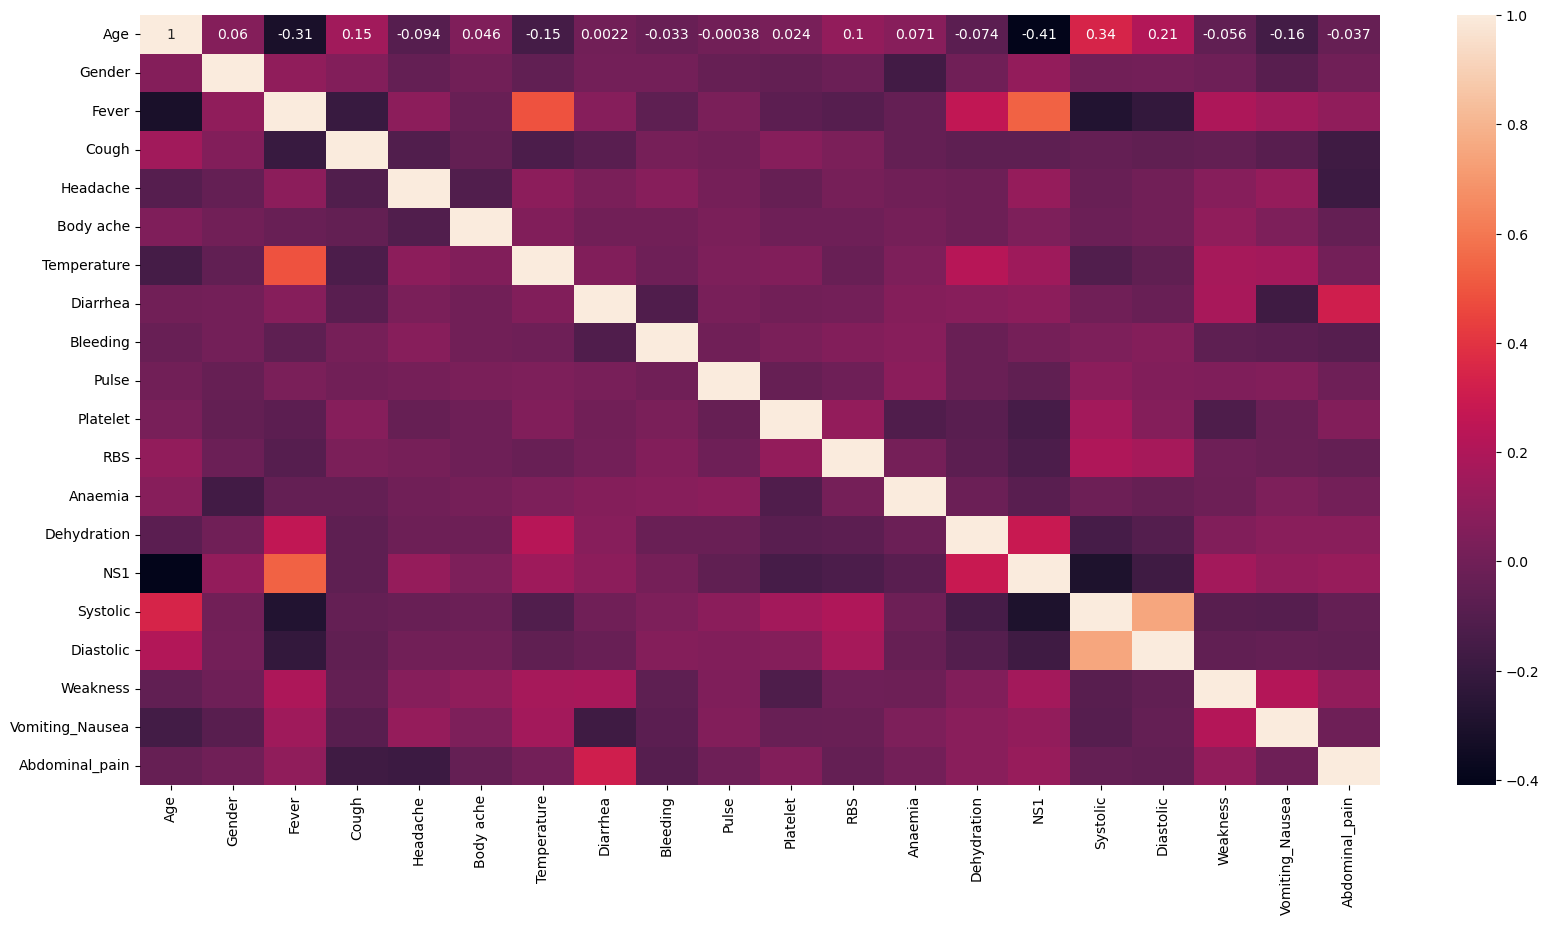

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cbar=True,annot=True);

In [6]:
des_analysis = df[numerical_columns].describe().T
des_analysis.drop(["count"], axis = 1,inplace = True)
des_analysis[["min", "max"]]

,min,max
Age,12.0,110.0
Temperature,96.0,105.0
Pulse,40.0,160.0
Platelet,8000.0,2235000.0
RBS,1.3,70.0
Systolic,70.0,240.0
Diastolic,30.0,130.0


In [7]:
df["RBS"].describe().T

count    721.000000
mean       9.569364
std        4.466772
min        1.300000
25%        7.400000
50%        9.569364
75%        9.569364
max       70.000000
Name: RBS, dtype: float64

In [8]:
(df[df["NS1"] == 1].shape[0]/df["NS1"].shape[0])*100,(df[df["NS1"] == 0].shape[0]/df["NS1"].shape[0])*100

(58.945908460471564, 41.05409153952843)

In [9]:
from sklearn.model_selection import train_test_split
x = np.array(df.drop(["NS1", "RBS"], axis = 1))
y = np.array(df["NS1"])
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((576, 18), (576,), (145, 18), (145,))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [11]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,20, 30,40,50,80,99,92],
}
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'penalty': ["l1","l2"],
            'C': [1,5,10],
            'class_weight':['balanced'],
            
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.1, 0.2, 0.4, 0.5, 1, 1.5, 2],
            'reg_lambda':[0.5,0.7, 0.89, 1, 1.5, 2]
            
        }
    }   
}

In [12]:
scores = []
cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


for model_name, mp in model_params.items():
    classifier =  GridSearchCV(mp['model'], mp['params'], cv=cross_validation, return_train_score=False)
    classifier.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_
    })
    
analysis = pd.DataFrame(scores,columns=['model','best_score','best_params'])
analysis

,model,best_score,best_params
0,random_forest,0.816552,{'n_estimators': 99}
1,logistic_regression,0.776552,"{'C': 1, 'class_weight': 'balanced', 'penalty'..."
2,naive_bayes_gaussian,0.710345,{}
3,decision_tree,0.784828,{'criterion': 'entropy'}
4,XGB_Classifier,0.849655,"{'base_score': 0.1, 'reg_lambda': 0.5}"


In [13]:
from sklearn.metrics import confusion_matrix as cm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=91,criterion="entropy")

model.fit(x_train, y_train)

# preds
score = model.score(x_test, y_test)

print(f"score: {score}")

score: 0.7862068965517242


In [15]:
x = np.array(df.drop(["NS1", "RBS", "Abdominal_pain"], axis = 1))
y = np.array(df["NS1"])
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

base_model1 = RandomForestClassifier(n_estimators=92)
base_model1.fit(x_train, y_train)
preds1 = base_model1.predict(x_test)
check1 = base_model1.predict(x_train)
score1 = analysis[analysis["model"] == "random_forest"]["best_score"].to_list()
matrix1 = cm(y_test, preds1)
matrix3 = cm(y_train, check1)


base_model2 = XGBClassifier(base_score = 0.5)
base_model2.fit(x_train, y_train)
preds2 = base_model2.predict(x_test)
check2 = base_model2.predict(x_train)

score2 = analysis[analysis["model"] == "XGB_Classifier"]["best_score"].to_list()
matrix2 = cm(y_test, preds2)
matrix4 = cm(y_train, check2)

print("For test Data:")
print(f"Random Forest Classifier: score: {score1[0]*100}%\n{matrix1}\nXGB Classifier: score: {score2[0]*100}%\n{matrix2}")
print("\n\n\nFor Training Data:")
print(f"Random Forest Classifier:\n{matrix3}\nXGB Classifier:\n{matrix4}")

For test Data:
Random Forest Classifier: score: 81.65517241379311%
[[51 18]
 [10 66]]
XGB Classifier: score: 84.9655172413793%
[[54 15]
 [10 66]]



For Training Data:
Random Forest Classifier:
[[227   0]
 [  0 349]]
XGB Classifier:
[[227   0]
 [  0 349]]


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
accuracy = accuracy_score(y_test, preds2)
precision = precision_score(y_test, preds2)
recall = recall_score(y_test, preds2)
f1 = f1_score(y_test, preds2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8275862068965517
Precision: 0.8148148148148148
Recall: 0.868421052631579
F1 Score: 0.8407643312101911


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


x = np.array(df.drop(["NS1", "RBS", "Abdominal_pain"], axis = 1))
y = np.array(df["NS1"])
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


model = XGBClassifier(base_score = 0.5)
model.fit(x_train, y_train)
preds = model.predict(x_test)
score = analysis[analysis["model"] == "XGB_Classifier"]["best_score"].to_list()
matrix = cm(y_test, preds)


accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
print(f"for test data:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

check = model.predict(x_train)
accuracy_train = accuracy_score(y_train, check)
precision_train = precision_score(y_train, check)
recall_train = recall_score(y_train, check)
f1_train = f1_score(y_train, check)
print(f"\n\nfor Training data:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

for test data:

Accuracy: 0.8482758620689655
Precision: 0.8941176470588236
Recall: 0.8539325842696629
F1 Score: 0.8735632183908046


for Training data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
